In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


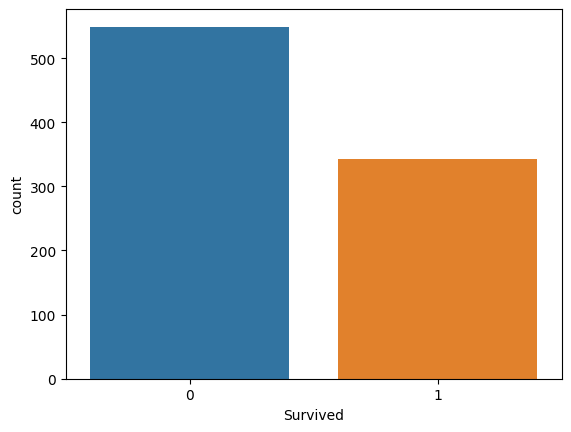

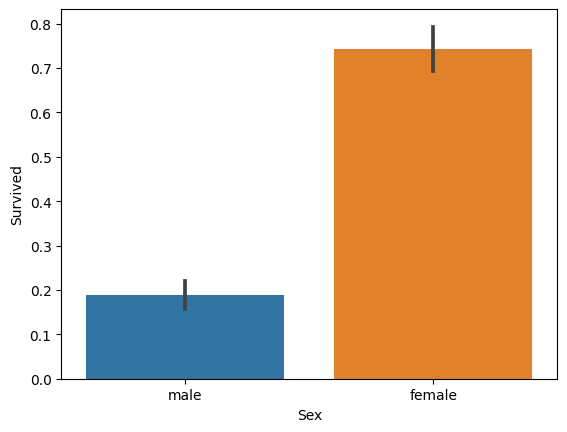

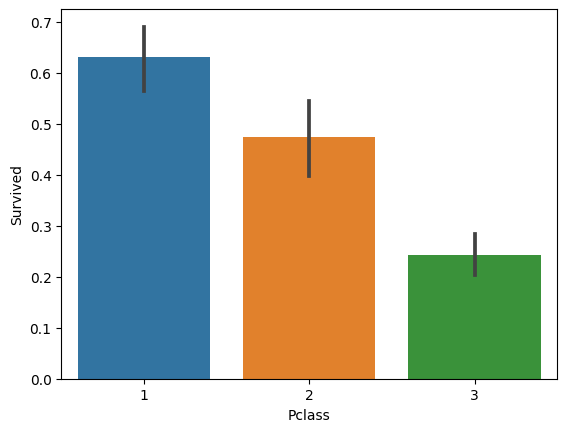

In [5]:
print(train_data.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train_data)
plt.show()

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()


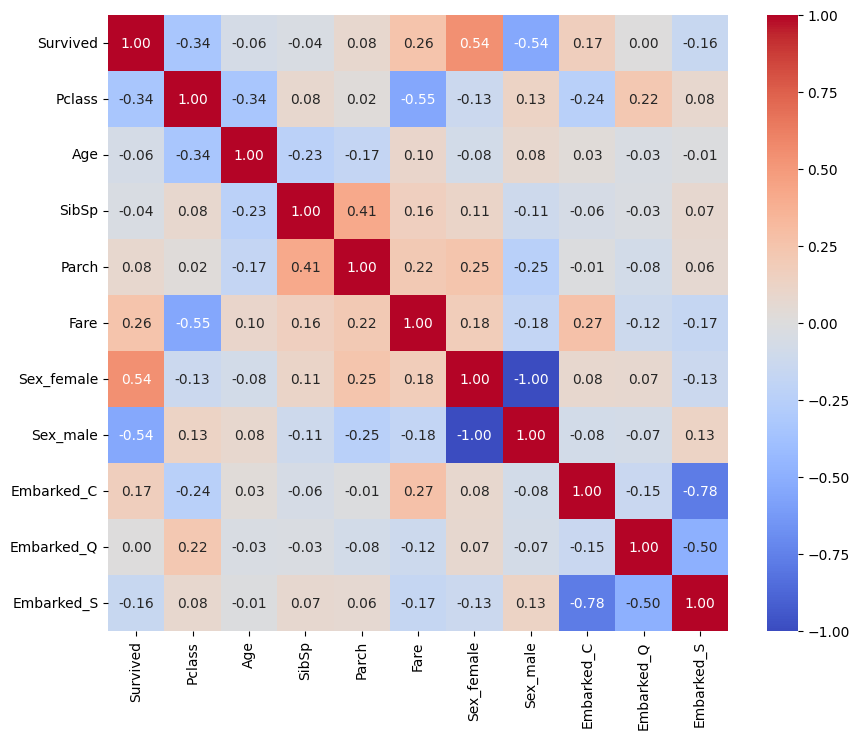

In [6]:
numeric_data = train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

numeric_data = pd.get_dummies(numeric_data, columns=['Sex', 'Embarked'])

numeric_data.fillna(numeric_data.median(), inplace=True) 

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices, test_indices in split.split(train_data, train_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = train_data.loc[train_indices]
    strat_test_set = train_data.loc[test_indices]


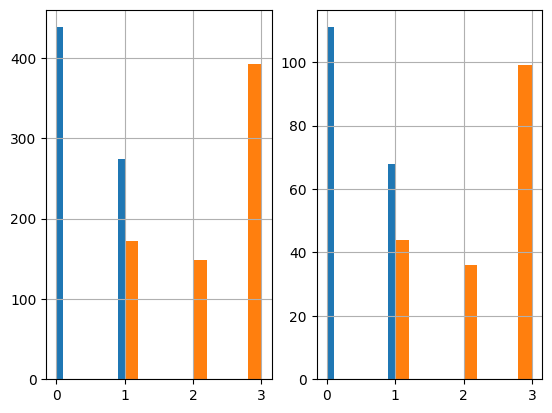

In [8]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 145 to 775
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          567 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy="mean"):
        self.imputer = SimpleImputer(strategy=strategy)
    
    def fit(self, X, y=None):
        self.imputer.fit(X[['Age']])
        return self
    
    def transform(self, X):
        X['Age'] = self.imputer.transform(X[['Age']])
        return X


In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder_embarked = OneHotEncoder(drop='first', sparse_output=False)
        self.encoder_sex = OneHotEncoder(drop='first', sparse_output=False)
    
    def fit(self, X, y=None):
        self.encoder_embarked.fit(X[["Embarked"]])
        self.encoder_sex.fit(X[["Sex"]])
        return self
    
    def transform(self, X):
        embarked_encoded = self.encoder_embarked.transform(X[["Embarked"]])
        embarked_columns = self.encoder_embarked.get_feature_names_out(["Embarked"])
        
        sex_encoded = self.encoder_sex.transform(X[["Sex"]])
        sex_columns = self.encoder_sex.get_feature_names_out(["Sex"])
        
        X = pd.concat([X, pd.DataFrame(embarked_encoded, columns=embarked_columns, index=X.index)], axis=1)
        X = pd.concat([X, pd.DataFrame(sex_encoded, columns=sex_columns, index=X.index)], axis=1)
        
        X.drop(["Embarked", "Sex"], axis=1, inplace=True)
        
        return X



In [12]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors = "ignore")

In [13]:
from sklearn.pipeline import Pipeline

strat_train_set.loc[:, 'Embarked'] = strat_train_set['Embarked'].fillna('C')
strat_test_set.loc[:, 'Embarked'] = strat_test_set['Embarked'].fillna('C')


pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),  
    ("featuredropper", FeatureDropper())    
])


In [14]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [15]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
145,146,0,2,19.0,1,1,36.7500,0.0,1.0,1.0
577,578,1,1,39.0,1,0,55.9000,0.0,1.0,0.0
152,153,0,3,55.5,0,0,8.0500,0.0,1.0,1.0
309,310,1,1,30.0,0,0,56.9292,0.0,0.0,0.0
319,320,1,1,40.0,1,1,134.5000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
879,880,1,1,56.0,0,1,83.1583,0.0,0.0,0.0
752,753,0,3,33.0,0,0,9.5000,0.0,1.0,1.0
744,745,1,3,31.0,0,0,7.9250,0.0,1.0,1.0
784,785,0,3,25.0,0,0,7.0500,0.0,1.0,1.0


In [16]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 145 to 775
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked_Q   712 non-null    float64
 8   Embarked_S   712 non-null    float64
 9   Sex_male     712 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 61.2 KB


In [17]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis = 1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators" : [10, 100, 200, 500], "max_depth" : [None, 5, 10], "min_samples_split" : [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [19]:
best_params = grid_search.best_params_

best_estimator = grid_search.best_estimator_

In [20]:
strat_test_set = pipeline.transform(strat_test_set)

In [21]:
X_test = strat_test_set.drop(['Survived'], axis=1, errors='ignore')
y_test = strat_test_set['Survived']


scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()



In [22]:
best_estimator.score(X_data_test, y_data_test)

0.8044692737430168

In [23]:
train_data.loc[:, 'Embarked'] = train_data['Embarked'].fillna('C')
test_data.loc[:, 'Embarked'] = test_data['Embarked'].fillna('C')

final_data = pipeline.fit_transform(train_data)

In [24]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22.000000,1,0,7.2500,0.0,1.0,1.0
1,2,1,1,38.000000,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,1.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,0.0,0.0,1.0


In [25]:
X_test = final_data.drop(['Survived'], axis=1, errors='ignore')
y_test = final_data['Survived']


scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_test)
y_data_final = y_test.to_numpy()



In [26]:
final_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators" : [10, 100, 200, 500], "max_depth" : [None, 5, 10], "min_samples_split" : [2, 3, 4]}
]

grid_search = GridSearchCV(final_clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [27]:
final_final_clf = grid_search.best_estimator_
final_final_clf

import joblib

model_filename = "titanic_model.pkl"

joblib.dump(final_final_clf, model_filename)
print(f"Model saved to {model_filename}")


Model saved to titanic_model.pkl


In [28]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
final_test_data = pipeline.fit_transform(test_data)
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked_Q   418 non-null    float64
 7   Embarked_S   418 non-null    float64
 8   Sex_male     418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [30]:
X_final_test = final_test_data
X_final_test = X_final_test.ffill()

scaler= StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [31]:
predictions = final_final_clf.predict(X_data_final_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [32]:
final_df = pd.DataFrame(test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("/kaggle/working/predict.csv", index = False)

In [33]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
